# Importar as bibliotecas e funções

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix # type: ignore

# Ler a base

In [ ]:
df = pd.read_csv('Filtragem_Transformada(3).csv')
df

,Id,Idade,Faixa idade,Gênero,Cor/raca/etnia,PCD,Vive no Brasil,Estado onde mora,UF onde mora,Região onde Mora,...,Qual sua situação atual de trabalho?,Setor,Numero de Funcionários,Cargo Atual,Nível,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?,Existe faculdade no Estado
0,001b2d1qtli8t9z7oqgdhj001b2d4i0g,31,30-34,Masculino,Branca,0,1,Minas Gerais (MG),MG,Sudeste,...,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,0,1
1,0026aa3fwd78u0026asg7456tfkjg2cs,30,30-34,Masculino,Branca,0,1,Espírito Santo (ES),ES,Sudeste,...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,de 101 a 500,Analista de BI/BI Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,de 3 a 4 anos,0,0
2,00r21rb9pusd1b0v7ew00r21rw3dy69w,37,35-39,Feminino,Amarela,0,1,São Paulo (SP),SP,Sudeste,...,Empregado (CLT),Finanças ou Bancos,Acima de 3.000,Analista de Dados/Data Analyst,Júnior,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Menos de 1 ano,0,1
3,00v0az4g792svil00vn6y1kfm9hq8vy9,34,30-34,Masculino,Branca,0,1,Minas Gerais (MG),MG,Sudeste,...,Empreendedor ou Empregado (CNPJ),Outra Opção,de 101 a 500,Analista de Dados/Data Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,0,1
4,015qqbrh4rr015qje9gvkbsb7ti1n5df,30,30-34,Masculino,Branca,0,1,Rio de Janeiro (RJ),RJ,Sudeste,...,Empreendedor ou Empregado (CNPJ),Tecnologia/Fábrica de Software,de 51 a 100,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,zwm2c16e32000c6iaswzwm2c1jv6swo0,36,35-39,Feminino,Parda,0,1,São Paulo (SP),SP,Sudeste,...,Empregado (CLT),Área da Saúde,de 101 a 500,Analista de Dados/Data Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,0,1
2903,zws1zie6ro3he9ln337yufzws1zyj7nw,23,22-24,Masculino,Parda,0,1,Goiás (GO),GO,Centro-oeste,...,Empregado (CLT),Varejo,de 51 a 100,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,de 3 a 4 anos,0,0
2904,zxvrsh0xk8z95k76e63zxvrshjgyigq0,27,25-29,Feminino,Parda,0,1,Espírito Santo (ES),ES,Sudeste,...,Empregado (CLT),Varejo,Acima de 3.000,Data Product Manager/ Product Manager (PM/APM/...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,0,0
2905,zy7hsey7pigk6d4a4zy7hsm7bh1vcozc,28,25-29,Masculino,Branca,0,1,São Paulo (SP),SP,Sudeste,...,Empregado (CLT),Finanças ou Bancos,de 501 a 1.000,Cientista de Dados/Data Scientist,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,0,1


In [ ]:
df.dtypes

,0
Id,object
Idade,int64
Faixa idade,object
Gênero,object
Cor/raca/etnia,object
PCD,int64
Vive no Brasil,int64
Estado onde mora,object
UF onde mora,object
Região onde Mora,object


## Retiração das colunas Região e Estado onde mora


In [ ]:
df = df.drop(['Região onde Mora'], axis = 'columns')
df = df.drop(['Estado onde mora'], axis = 'columns')

## Dropando coluna inútil

In [ ]:
df = df.drop(['Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'], axis = 'columns')
df = df.drop(['Numero de Funcionários'], axis = 'columns')
df = df.drop(['Qual sua situação atual de trabalho?'], axis = 'columns')
df = df.drop(['Id'], axis = 'columns')

## Transformação dos gêneros em 0s e 1s

Masculino == 0
Feminino == 1

In [ ]:
df['Gênero'] = df['Gênero'].replace({'Masculino': 0, 'Feminino': 1})
df['Gênero'] = df['Gênero'].replace({'Outro': 0, 'Prefiro não informar': 0})

<ipython-input-40-a884458a2b61>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gênero'] = df['Gênero'].replace({'Outro': 0, 'Prefiro não informar': 0})


## Transformação dos dados em ordem alfabética

In [ ]:
df['Faixa idade'] = LabelEncoder().fit_transform(df['Faixa idade'])
#df['UF onde mora'] = LabelEncoder().fit_transform(df['UF onde mora'])
df['Área de Formação'] = LabelEncoder().fit_transform(df['Área de Formação'])
df['Setor'] = LabelEncoder().fit_transform(df['Setor'])
df['Cargo Atual'] = LabelEncoder().fit_transform(df['Cargo Atual'])
df['Faixa salarial'] = LabelEncoder().fit_transform(df['Faixa salarial'])
df['Quanto tempo de experiência na área de dados você tem?'] = LabelEncoder().fit_transform(df['Quanto tempo de experiência na área de dados você tem?'])
df['Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'] = LabelEncoder().fit_transform(df['Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?'])
df['Cor/raca/etnia'] = LabelEncoder().fit_transform(df['Cor/raca/etnia'])


##Transformando o Nível de Ensino em números crescentes



*   Estudante - 0
*   Graduação - 1
*   Pós - 2
*   Mest - 3
*   Dout - 4

In [ ]:
df['Nível de Ensino'] = df['Nível de Ensino'].replace({'Estudante de Graduação': 0, 'Graduação/Bacharelado': 1, 'Pós-graduação': 2, 'Mestrado': 3, 'Doutorado ou Phd': 4})

<ipython-input-42-c8c2a0ce5d0f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Nível de Ensino'] = df['Nível de Ensino'].replace({'Estudante de Graduação': 0, 'Graduação/Bacharelado': 1, 'Pós-graduação': 2, 'Mestrado': 3, 'Doutorado ou Phd': 4})


## Transformando o Nível em números crescentes


*   Junior - 0
*   Pleno - 1
*   Senior - 2




In [ ]:
df['Nível'] = df['Nível'].replace({'Júnior': 0, 'Pleno': 1, 'Sênior': 2})

<ipython-input-43-1a3441c70546>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Nível'] = df['Nível'].replace({'Júnior': 0, 'Pleno': 1, 'Sênior': 2})


In [ ]:
df

,Idade,Faixa idade,Gênero,Cor/raca/etnia,PCD,Vive no Brasil,Estado onde mora,UF onde mora,Região onde Mora,Nível de Ensino,Área de Formação,Setor,Cargo Atual,Nível,Faixa salarial,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Existe faculdade no Estado
0,31,3,0,1,0,1,Minas Gerais (MG),MG,Sudeste,4,2,4,3,2,4,4,2,1
1,30,3,0,1,0,1,Espírito Santo (ES),ES,Sudeste,1,2,4,0,1,12,4,4,0
2,37,4,1,0,0,1,São Paulo (SP),SP,Sudeste,1,2,4,1,0,12,3,1,1
3,34,3,0,1,0,1,Minas Gerais (MG),MG,Sudeste,4,3,8,1,0,11,1,1,1
4,30,3,0,1,0,1,Rio de Janeiro (RJ),RJ,Sudeste,0,2,16,6,1,13,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,36,4,1,4,0,1,São Paulo (SP),SP,Sudeste,2,3,19,1,1,12,4,2,1
2903,23,1,0,4,0,1,Goiás (GO),GO,Centro-oeste,1,2,18,1,0,9,1,4,0
2904,27,2,1,4,0,1,Espírito Santo (ES),ES,Sudeste,1,7,18,5,1,13,4,2,0
2905,28,2,0,1,0,1,São Paulo (SP),SP,Sudeste,1,8,4,3,0,13,3,2,1


In [ ]:
df.dtypes

,0
Idade,int64
Faixa idade,int64
Gênero,int64
Cor/raca/etnia,int64
PCD,int64
Vive no Brasil,int64
Estado onde mora,object
UF onde mora,object
Região onde Mora,object
Nível de Ensino,int64


## Separação em X e Y

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df.drop(columns=['Nível']), df['Nível'], test_size=0.25, random_state=42)

modelo = DecisionTreeClassifier(criterion='gini', max_depth=5)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=5)

In [ ]:
previsoesTeste = modelo.predict(X_teste)
previsoesTreino = modelo.predict(X_treino)

## Precisao Treino


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore
accuracy_score(y_treino,previsoesTreino)

0.7288990825688073

## Precisao Teste


In [ ]:
accuracy_score(y_teste,previsoesTeste)

0.6795048143053645

## Matriz Treino

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_treino, previsoesTreino)

array([[498,  89,   4],
       [184, 487, 130],
       [ 20, 164, 604]])

## Matriz Teste

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoesTeste)

array([[144,  26,   1],
       [ 65, 155,  60],
       [ 10,  71, 195]])

## Visualização de Acertos do Teste


*   0 = Junior
*   1 = Pleno
*   2 = Senior

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7288990825688073

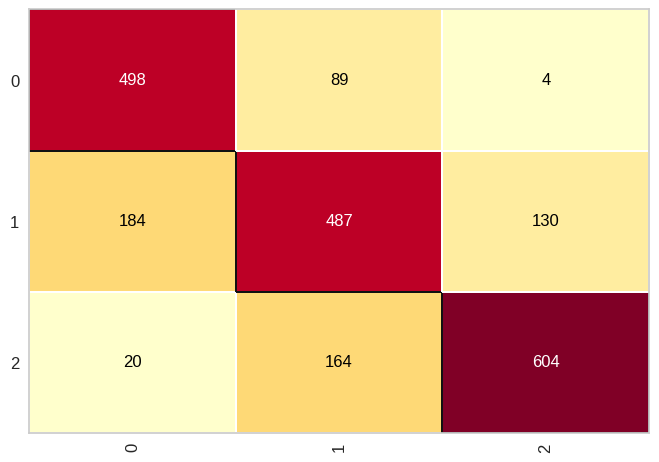

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_treino, y_treino)

## Visualização de Acertos do Teste



*   0 = Junior
*   1 = Pleno
*   2 = Senior

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6795048143053645

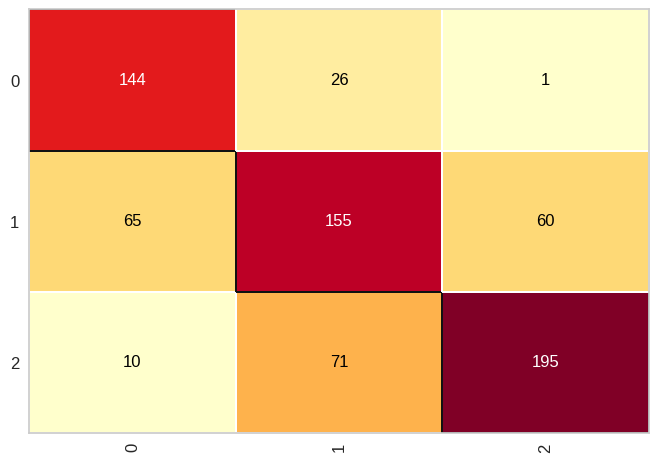

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

## Precision Treino

In [ ]:
print(classification_report(y_treino, previsoesTreino))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       591
           1       0.66      0.61      0.63       801
           2       0.82      0.77      0.79       788

    accuracy                           0.73      2180
   macro avg       0.73      0.74      0.73      2180
weighted avg       0.73      0.73      0.73      2180



## Precision Teste

In [ ]:
print(classification_report(y_teste, previsoesTeste))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       171
           1       0.62      0.55      0.58       280
           2       0.76      0.71      0.73       276

    accuracy                           0.68       727
   macro avg       0.68      0.70      0.68       727
weighted avg       0.68      0.68      0.68       727



KeyboardInterrupt: 

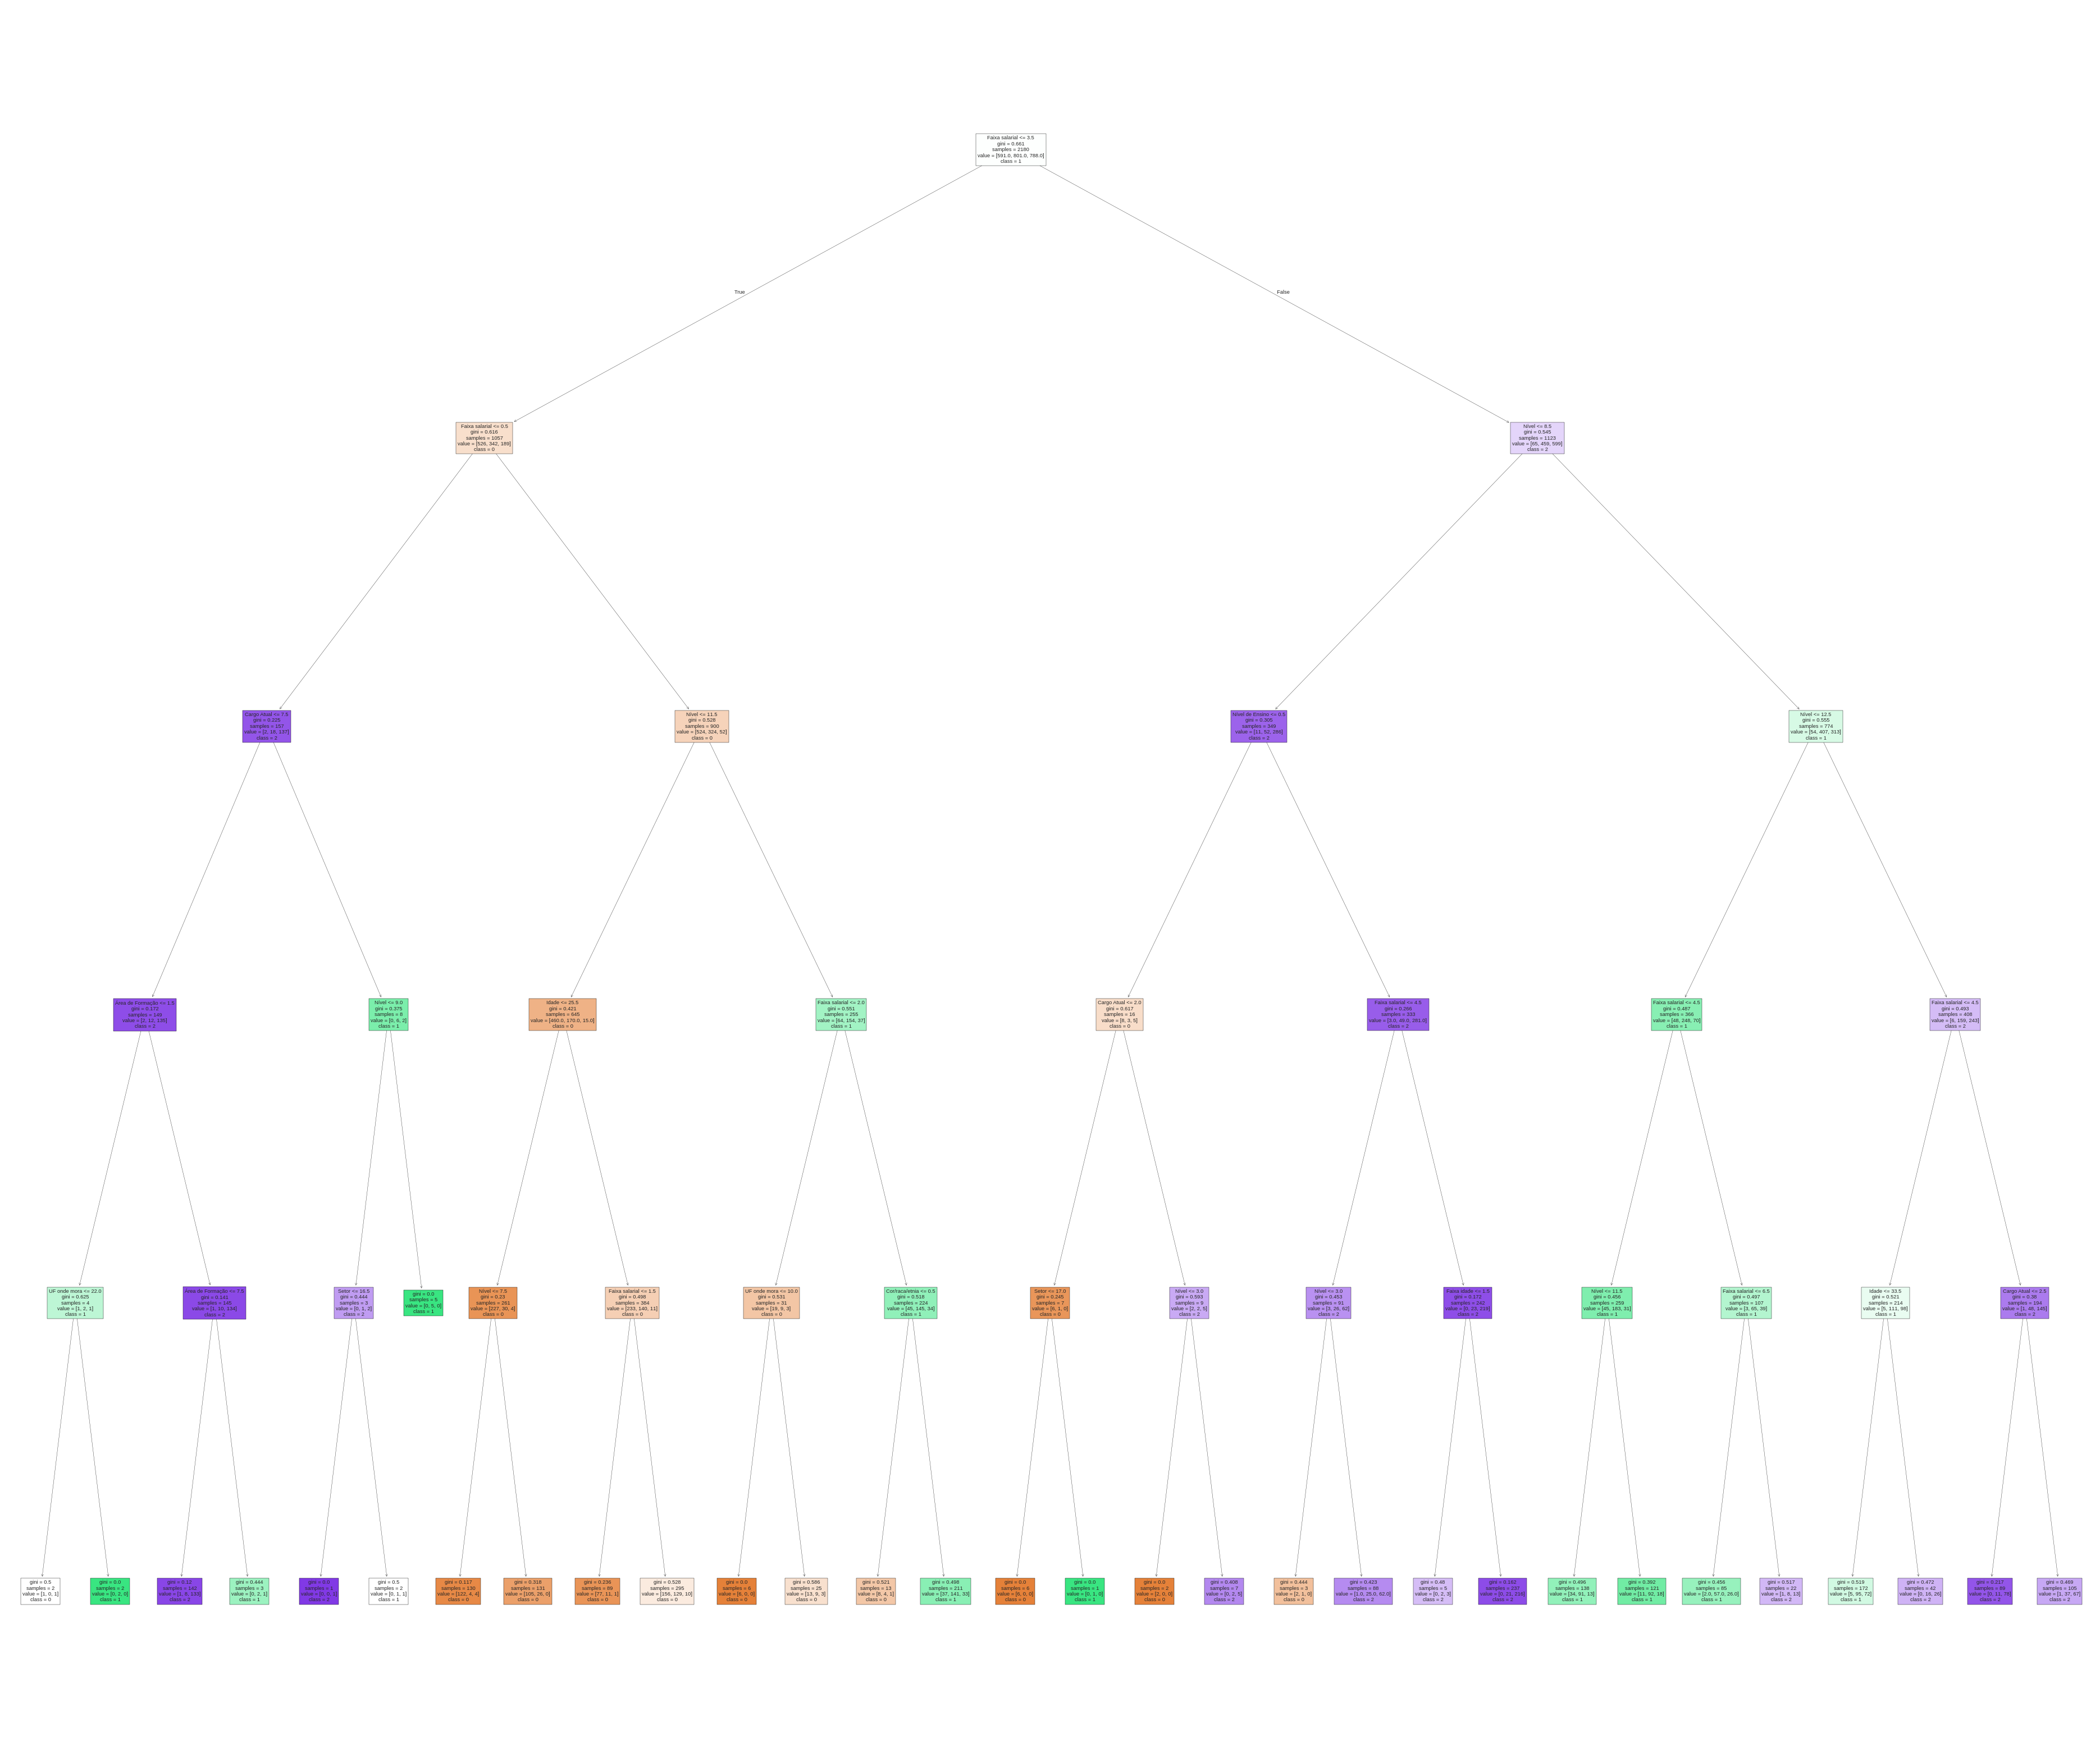

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
previsores = df.columns
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(48,40))
tree.plot_tree(modelo, feature_names=previsores, class_names = ['0', '1', '2'], filled=True);
plt.savefig("modelo_arvore.png", dpi=600)

In [ ]:
from google.colab import files
df.to_csv('Filtragem_Transformada.csv', index=False)  # Salva o DataFrame modificado
files.download('Filtragem_Transformada.csv')          # Faz o download do arquivo atualizado

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>